# 问题：小费字段，与哪些因素相关最大

### 数据集字段说明
- 消费总金额(totall_bill)(不含小费)
- 小费金额(tip)
- 顾客性别(sex)
- 消费的星期(day)
- 消费的时间段(time)
- 用餐人数(size)
- 顾客是否抽烟(smoker)

In [1]:
import pandas as pd

### 读取数据

In [2]:
df = pd.read_excel("小费数据集.xlsx")

In [3]:
df.head(3)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

### 全都转换成数字

In [4]:
df_dummpies = pd.get_dummies(df)

In [5]:
df_dummpies

total_bill   tip  size  sex_Female  sex_Male  smoker_No  smoker_Yes  \
0         16.99  1.01     2           1         0          1           0   
1         10.34  1.66     3           0         1          1           0   
2         21.01  3.50     3           0         1          1           0   
3         23.68  3.31     2           0         1          1           0   
4         24.59  3.61     4           1         0          1           0   
..          ...   ...   ...         ...       ...        ...         ...   
239       29.03  5.92     3           0         1          1           0   
240       27.18  2.00     2           1         0          0           1   
241       22.67  2.00     2           0         1          0           1   
242       17.82  1.75     2           0         1          1           0   
243       18.78  3.00     2           1         0          1           0   

     day_Fri  day_Sat  day_Sun  day_Thur  time_Dinner  time_Lunch  
0          0        0        1         0            1           0  
1          0        0        1         0            1           0  
2          0        0        1         0            1           0  
3          0        0        1         0            1           0  
4          0        0        1         0            1           0  
..       ...      ...      ...       ...          ...         ...  
239        0        1        0         0            1           0  
240        0        1        0         0            1           0  
241        0        1        0         0            1           0  
242        0        1        0         0            1           0  
243        0        0        0         1            1           0  

[244 rows x 13 columns]

### 计算相关性

In [6]:
# 相关型矩阵
df_dummpies.corr()

total_bill       tip      size  sex_Female  sex_Male  smoker_No  \
total_bill     1.000000  0.675734  0.598315   -0.144877  0.144877  -0.085721   
tip            0.675734  1.000000  0.489299   -0.088862  0.088862  -0.005929   
size           0.598315  0.489299  1.000000   -0.086195  0.086195   0.133178   
sex_Female    -0.144877 -0.088862 -0.086195    1.000000 -1.000000   0.002816   
sex_Male       0.144877  0.088862  0.086195   -1.000000  1.000000  -0.002816   
smoker_No     -0.085721 -0.005929  0.133178    0.002816 -0.002816   1.000000   
smoker_Yes     0.085721  0.005929 -0.133178   -0.002816  0.002816  -1.000000   
day_Fri       -0.086168 -0.055463 -0.142184    0.071060 -0.071060  -0.244316   
day_Sat        0.054919 -0.002790 -0.041121   -0.053957  0.053957  -0.155744   
day_Sun        0.122953  0.125114  0.193054   -0.168106  0.168106   0.181624   
day_Thur      -0.138174 -0.095879 -0.072598    0.194445 -0.194445   0.128534   
time_Dinner    0.183118  0.121629  0.103411   -0.205231  0.205231  -0.054921   
time_Lunch    -0.183118 -0.121629 -0.103411    0.205231 -0.205231   0.054921   

             smoker_Yes   day_Fri   day_Sat   day_Sun  day_Thur  time_Dinner  \
total_bill     0.085721 -0.086168  0.054919  0.122953 -0.138174     0.183118   
tip            0.005929 -0.055463 -0.002790  0.125114 -0.095879     0.121629   
size          -0.133178 -0.142184 -0.041121  0.193054 -0.072598     0.103411   
sex_Female    -0.002816  0.071060 -0.053957 -0.168106  0.194445    -0.205231   
sex_Male       0.002816 -0.071060  0.053957  0.168106 -0.194445     0.205231   
smoker_No     -1.000000 -0.244316 -0.155744  0.181624  0.128534    -0.054921   
smoker_Yes     1.000000  0.244316  0.155744 -0.181624 -0.128534     0.054921   
day_Fri        0.244316  1.000000 -0.216319 -0.195451 -0.169608    -0.058159   
day_Sat        0.155744 -0.216319  1.000000 -0.500682 -0.434480     0.462709   
day_Sun       -0.181624 -0.195451 -0.500682  1.000000 -0.392566     0.418071   
day_Thur      -0.128534 -0.169608 -0.434480 -0.392566  1.000000    -0.917996   
time_Dinner    0.054921 -0.058159  0.462709  0.418071 -0.917996     1.000000   
time_Lunch    -0.054921  0.058159 -0.462709 -0.418071  0.917996    -1.000000   

             time_Lunch  
total_bill    -0.183118  
tip           -0.121629  
size          -0.103411  
sex_Female     0.205231  
sex_Male      -0.205231  
smoker_No      0.054921  
smoker_Yes    -0.054921  
day_Fri        0.058159  
day_Sat       -0.462709  
day_Sun       -0.418071  
day_Thur       0.917996  
time_Dinner   -1.000000  
time_Lunch     1.000000

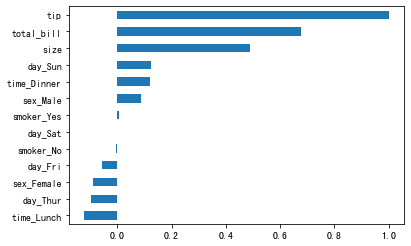

In [7]:
df_dummpies.corr()["tip"].sort_values().plot.barh()